# I. Dữ liệu ngân hàng

### 1. Import Thư viện

In [1]:
from vnstock3 import Quote
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import gaussian_kde, norm
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from IPython.display import Image, display
import time
from pyvis.network import Network
import networkx as nx
from statsmodels.tsa.stattools import adfuller
import warnings
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from ipywidgets import interact
from IPython.display import display, clear_output
from statsmodels.tsa.stattools import grangercausalitytests
import ipywidgets as widgets
from plotly.subplots import make_subplots
import os

warnings.filterwarnings("ignore")
pandas2ri.activate()

Device registration failed: cannot import name 'optimize_execution' from partially initialized module 'vnai' (most likely due to a circular import) (c:\Users\tranm\AppData\Local\Programs\Python\Python312\Lib\vnai\__init__.py). Using fallback.


Thư viện `vnstock3` đã được hợp nhất với tên gọi `vnstock`. Phiên bản mới nhất 3.3.0 đã có mặt.Vui lòng chuyển đổi gói thư viện thành `vnstock` để luôn nhận bản cập nhật với câu lệnh : `pip install vnstock --upgrade`.
Lịch sử phiên bản: https://vnstocks.com/docs/tai-lieu/lich-su-phien-ban
Phiên bản hiện tại 3.2.1

### 2. Dữ liệu ngân hàng

In [ ]:
bank_tickers_vn = [
    "VCB",  # Vietcombank
    "BID",  # BIDV
    "CTG",  # VietinBank
    "TCB",  # Techcombank
    "MBB",  # MB Bank
    "STB",  # Sacombank
    "ACB",  # ACB Bank
    "HDB",  # HDBank
    "TPB",  # TPBank
    "LPB",  # LienVietPostBank
    "VIB",  # VIB Bank
    "EIB",  # Eximbank
    "SHB",  # SHB Bank
    "MSB",  # Maritime Bank
    "BAB",  # Bac A Bank
    "OCB",  # Orient Commercial Bank
    "PGB",  # PGBank
    "NVB",  # NCB Bank
    "SGB",  # Saigon Bank
    "KLB",  # KienlongBank
    "VAB",  # VietABank
    "ABB",  # An Binh Bank
    "BVB",  # Viet Capital Bank
    "NAB",  # Nam A Bank
]
ticker = {}
volume = {}
for i in bank_tickers_vn:
    quote = Quote(symbol=i)
    data = quote.history(start="2024-01-02", end="2024-12-31", interval="1D")
    ticker[i] = data[["time", "close"]]
    volume[i] = data[["time", "volume"]]

### 3. Lọc ngân hàng

### Bước 1: Lọc theo tính thanh khoản

In [ ]:
vol = pd.DataFrame()

for symbol, data in volume.items():
    vol = (
        pd.merge(vol, data.rename(columns={"volume": symbol}), on="time", how="outer")
        if not vol.empty
        else data.rename(columns={"volume": symbol})
    )
vol

,time,VCB,BID,CTG,TCB,MBB,STB,ACB,HDB,TPB,...,BAB,OCB,PGB,NVB,SGB,KLB,VAB,ABB,BVB,NAB
0,2024-01-02,1788420,1112938,3302172,3711936,13795931,14815625,13896933,6720342,6972007,...,6105,1021739,7967,376533,18219.0,9994,236591,5601666,48634,1494380.0
1,2024-01-03,1374590,1561832,3125515,5612090,13867158,19993388,9817807,8194761,7156654,...,5449,2267146,85498,387079,7661.0,18432,219038,1637046,200436,504766.0
2,2024-01-04,2660779,3214754,14699663,10076237,49460264,31418651,23605373,11217405,30604262,...,21356,5260055,71241,818568,20061.0,50606,1142021,4623006,1427493,1380633.0
3,2024-01-05,1181807,1331657,8768136,3571390,22545252,31294814,9282598,6539053,11027926,...,38428,6776778,17950,314485,10879.0,30320,209966,1200962,946460,1342980.0
4,2024-01-08,1611721,1951306,12118831,6326633,20170178,15857047,12398885,5517166,10135587,...,24125,6706089,21510,368225,12414.0,13471,387295,962879,412968,831213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2024-12-25,1829185,5281584,25202624,18375223,14826477,24376900,9518178,10201000,14532759,...,5947,4786544,43005,89500,600.0,110505,217363,1362700,1959946,4130645.0
246,2024-12-26,2203884,3886725,4851169,5478381,19914942,16442000,5583577,7888400,6868626,...,2100,1518139,26948,45500,900.0,54660,43921,162500,843146,1085279.0
247,2024-12-27,1640901,2862726,9543989,15399674,16712626,11145700,7694895,12436100,27808453,...,2702,2747583,11219,199700,700.0,52604,250911,395000,807998,3595926.0
248,2024-12-30,1707785,4013327,7214379,10149321,11072609,10631900,5004572,10589200,6737172,...,2475,1463435,1212,36600,1000.0,44901,484026,287600,598799,4630412.0


In [ ]:
def liquidity_filter(volume_df, bottom_percent=0.20, window=60):
    """
    volume_df: DataFrame có dạng:
        index = datetime
        columns = mã cổ phiếu
        giá trị = volume / khối lượng giao dịch mỗi ngày

    bottom_percent: mặc định lọc bottom 20%
    window: số ngày rolling (60)
    """

    # Tính average volume rolling 60 ngày
    avg_volume_60 = volume_df.rolling(window=window).mean().tail(1).T
    avg_volume_60.columns = ["avg_vol_60"]

    # Ngưỡng cutoff: phân vị bottom X%
    cutoff = avg_volume_60["avg_vol_60"].quantile(bottom_percent)

    # Lọc cổ phiếu có avg volume thấp
    bad_liquidity = avg_volume_60[avg_volume_60["avg_vol_60"] <= cutoff]
    good_liquidity = avg_volume_60[avg_volume_60["avg_vol_60"] > cutoff]

    return list(good_liquidity.index)


liquidity = liquidity_filter(vol.loc[:, vol.columns != "time"])

### Bước 2: Lọc theo Risk Decay

In [ ]:
def risk_decay_filter(df_log, window_short=30, window_long=90, threshold=1):
    """
    df_log: DataFrame log-return (index = datetime, columns = tickers)
    window_short: số ngày volatility ngắn hạn (default 30)
    window_long: số ngày volatility dài hạn (default 90)
    threshold: ngưỡng risk_decay > threshold -> loại (default 1.1)

    Returns: dict
    - risk_decay_last: risk decay cuối chuỗi
    - bad: danh sách cổ phiếu bị loại
    - good: danh sách cổ phiếu giữ lại
    """

    # Volatility 30 ngày và 90 ngày
    vol_short = df_log.rolling(window_short).std()
    vol_long = df_log.rolling(window_long).std()

    # Risk decay
    risk_decay = vol_short / vol_long

    # Lấy risk decay mới nhất
    risk_decay_last = risk_decay.tail(1).T
    risk_decay_last.columns = ["risk_decay"]

    # Lọc
    bad = risk_decay_last[risk_decay_last["risk_decay"] > threshold].index.tolist()
    good = risk_decay_last[risk_decay_last["risk_decay"] <= threshold].index.tolist()

    return good


risk_decay = risk_decay_filter(vol.loc[:, vol.columns != "time"][liquidity])

### 4. Tính log return

### Đồng bộ ngày giữa các ngân hàng

In [ ]:
df = pd.DataFrame()

for symbol, data in ticker.items():
    df = (
        pd.merge(df, data.rename(columns={"close": symbol}), on="time", how="outer")
        if not df.empty
        else data.rename(columns={"close": symbol})
    )

# Loại bỏ các dòng bị thiếu nhiều dữ liệu
df = df.sort_values("time").dropna().reset_index(drop=True)
print(len(df))
df.head()

241


,time,VCB,BID,CTG,TCB,MBB,STB,ACB,HDB,TPB,...,BAB,OCB,PGB,NVB,SGB,KLB,VAB,ABB,BVB,NAB
0,2024-01-02,55.45,35.14,26.98,15.16,12.04,27.75,17.16,15.93,12.45,...,10.86,9.84,13.55,10.8,11.64,7.19,4.63,8.2,9.35,10.11
1,2024-01-03,56.12,35.80,27.38,15.40,12.23,28.50,17.55,16.01,12.56,...,10.95,10.14,13.81,11.0,11.73,7.25,4.63,8.3,9.53,10.11
2,2024-01-04,57.04,35.68,28.37,15.64,12.84,28.60,17.76,16.33,12.89,...,11.20,10.28,13.76,11.4,12.18,7.38,4.63,8.3,9.80,10.18
3,2024-01-05,57.24,36.37,28.77,15.68,13.09,29.30,17.86,16.41,12.96,...,11.37,10.43,13.76,11.2,12.09,7.56,4.70,8.2,9.89,10.18
4,2024-01-08,57.64,37.92,29.31,16.11,13.22,29.20,17.79,16.45,12.92,...,11.63,10.68,13.76,11.1,11.73,7.50,4.70,8.2,9.89,10.18


### Tính log return

In [ ]:
df_log = df.copy()

# Tính log return cho tất cả các cột (trừ 'time')
df_log.loc[:, df.columns != "time"] = np.log(
    df.loc[:, df.columns != "time"] / df.loc[:, df.columns != "time"].shift(1)
)

# Giữ nguyên cột time
df_log = df_log.dropna().reset_index(drop=True)

df_log

,time,VCB,BID,CTG,TCB,MBB,STB,ACB,HDB,TPB,...,BAB,OCB,PGB,NVB,SGB,KLB,VAB,ABB,BVB,NAB
0,2024-01-03,0.012011,0.018608,0.014717,0.015707,0.015658,0.026668,0.022473,0.005009,0.008797,...,0.008253,0.030032,0.019006,0.018349,0.007702,0.008310,0.000000,0.012121,0.019068,0.000000
1,2024-01-04,0.016261,-0.003358,0.035519,0.015464,0.048673,0.003503,0.011895,0.019790,0.025935,...,0.022574,0.013712,-0.003627,0.035718,0.037646,0.017772,0.000000,0.000000,0.027938,0.006900
2,2024-01-05,0.003500,0.019154,0.014001,0.002554,0.019283,0.024181,0.005615,0.004887,0.005416,...,0.015065,0.014486,0.000000,-0.017700,-0.007417,0.024098,0.015006,-0.012121,0.009142,0.000000
3,2024-01-08,0.006964,0.041734,0.018596,0.027054,0.009882,-0.003419,-0.003927,0.002435,-0.003091,...,0.022610,0.023687,0.000000,-0.008969,-0.030229,-0.007968,0.000000,0.000000,0.000000,0.000000
4,2024-01-09,0.011557,-0.007411,0.015236,0.011725,0.007536,0.000000,-0.013583,0.000000,-0.010895,...,-0.007769,-0.006576,-0.007294,-0.009050,0.022757,0.000000,0.000000,-0.012270,-0.009142,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2024-12-25,0.003265,0.014229,0.053671,0.018645,0.022815,0.043700,0.017557,0.021142,0.021521,...,0.008193,0.009360,-0.019608,0.000000,0.000000,0.018094,0.009917,0.027029,0.025631,0.006329
236,2024-12-26,-0.003265,0.009116,0.000000,-0.004207,0.018007,0.023178,0.004224,0.010406,0.008889,...,-0.008193,-0.009360,0.000000,0.000000,0.000000,0.000000,-0.009917,-0.013423,0.008688,0.006289
237,2024-12-27,0.001144,0.003881,0.015711,0.010484,0.006135,0.008054,0.000000,0.032589,0.012179,...,0.000000,0.005211,-0.006321,0.000000,0.000000,-0.008310,0.009917,0.000000,-0.017452,0.006250
238,2024-12-30,-0.002125,-0.023254,0.002595,-0.008379,-0.009834,0.011960,-0.006108,0.065915,-0.006071,...,0.008193,0.004149,0.000000,0.000000,0.000000,0.000000,0.011447,0.000000,0.000000,0.000000


### Đồ thị log return

In [ ]:
fig = go.Figure()

# Add traces (chỉ hiện trace đầu tiên)
for idx, i in enumerate(bank_tickers_vn):
    fig.add_trace(
        go.Scatter(
            x=df_log["time"],
            y=df_log[i],
            mode="lines",
            line=dict(width=2, color="#8C00FF"),
            name=i,
            visible=(idx == 0),
        )
    )

steps = []
for idx, i in enumerate(bank_tickers_vn):
    visible_list = [False] * len(bank_tickers_vn)
    visible_list[idx] = True

    steps.append(
        dict(
            label=i,  #
            method="update",
            args=[{"visible": visible_list}, {"title": f"Log return of {i}"}],
        )
    )

fig.update_layout(
    title=f"Log return of {bank_tickers_vn[0]}",
    xaxis_title="Time",
    yaxis_title="Log return",
    template="plotly_dark",
    height=480,
    sliders=[
        dict(
            active=0,
            steps=steps,
            currentvalue={"prefix": "Bank: "},
            x=0.5,
            xanchor="center",
            pad={"t": 60},  # đẩy slider xuống dưới
        )
    ],
)

fig.show()

# II. Xác định các chỉ số và tính chất dữ liệu

In [ ]:
df_log = df_log.loc[:, ["time"] + risk_decay]
selected_bank = risk_decay

### 1. Thống kê mô tả

In [ ]:
# Mean
df_mean = df_log.drop(columns=["time"]).copy()
df_mean = df_mean.mean().to_frame(name="mean")
df_mean

,mean
BID,0.000231
TCB,0.001916
MBB,0.001283
STB,0.001187
ACB,0.000951
TPB,0.000715
LPB,0.003423
VIB,0.000872
EIB,0.000539
SHB,-0.000099


In [ ]:
# Variance
df_var = df_log.drop(columns=["time"]).copy()
df_var = df_var.var().to_frame(name="Variance")
df_var

,Variance
BID,0.000224
TCB,0.000255
MBB,0.000228
STB,0.000272
ACB,0.000141
TPB,0.000290
LPB,0.000332
VIB,0.000177
EIB,0.000292
SHB,0.000153


In [ ]:
# Standard Deviation
df_std = df_log.drop(columns=["time"]).copy()
df_std = df_std.std().to_frame(name="Standard Deviation")
df_std

,Standard Deviation
BID,0.014951
TCB,0.015960
MBB,0.015102
STB,0.016490
ACB,0.011873
TPB,0.017036
LPB,0.018217
VIB,0.013317
EIB,0.017099
SHB,0.012352


In [ ]:
# Tứ phân vị
df_quantile = df_log.drop(columns=["time"]).copy()
df_quantile_25 = df_quantile.quantile(q=0.25).values
df_quantile_50 = df_quantile.quantile(q=0.5).values
df_quantile_75 = df_quantile.quantile(q=0.75).values

cols = df_quantile.columns

df_quantiles = pd.DataFrame(
    {"Q1": df_quantile_25, "Q2": df_quantile_50, "Q3": df_quantile_75}, index=cols
)

df_quantiles

,Q1,Q2,Q3
BID,-0.008095,0.000000,0.007873
TCB,-0.006323,0.000000,0.010072
MBB,-0.006259,0.000000,0.008364
STB,-0.006888,0.001633,0.009566
ACB,-0.005820,0.000000,0.006331
TPB,-0.006297,0.000000,0.008520
LPB,-0.007798,0.001687,0.009094
VIB,-0.005242,0.000000,0.007345
EIB,-0.008221,0.000000,0.010312
SHB,-0.005070,0.000000,0.007870


In [ ]:
# Skewness
df_skew = df_log.drop(columns=["time"]).copy()
df_skew = df_skew.skew().to_frame(name="Skewness")
df_skew

,Skewness
BID,-0.118405
TCB,0.195756
MBB,-0.001926
STB,-0.270889
ACB,0.262424
TPB,-0.083218
LPB,1.129957
VIB,0.607505
EIB,0.232646
SHB,-0.422512


In [ ]:
# Kurtosis
df_kurt = df_log.drop(columns=["time"]).copy()
df_kurt = df_kurt.kurtosis().to_frame(name="Kurtosis")
df_kurt

,Kurtosis
BID,3.256802
TCB,2.954659
MBB,1.874848
STB,2.847693
ACB,2.917891
TPB,4.339676
LPB,3.015085
VIB,3.164335
EIB,2.568233
SHB,3.124153


### 2. Kiểm định phân phối chuẩn

### Kiểm định phân phối chuẩn với Jarque Bera

In [ ]:
p_val = []
for i in selected_bank:
    p_val.append(jarque_bera(df_log[i])[1])
df_norm = pd.DataFrame(data={"Bank": selected_bank, "P_value": p_val})


def check_norm(p_value, alpha=0.05):
    return "Not normally distributed" if p_value < alpha else "Normally distributed"


df_norm["Normality"] = df_norm["P_value"].apply(check_norm)
df_norm

,Bank,P_value,Normality
0,BID,1.365148e-22,Not normally distributed
1,TCB,6.353131e-19,Not normally distributed
2,MBB,7.537148e-08,Not normally distributed
3,STB,6.073189e-18,Not normally distributed
4,ACB,9.698995e-19,Not normally distributed
5,TPB,1.514857e-39,Not normally distributed
6,LPB,2.723515e-30,Not normally distributed
7,VIB,2.072317e-24,Not normally distributed
8,EIB,1.177222e-14,Not normally distributed
9,SHB,2.970350e-22,Not normally distributed


### Trực quan phân phối

In [ ]:
fig = go.Figure()

# Tạo tất cả traces trước (3 traces cho mỗi ngân hàng)
for idx, i in enumerate(selected_bank):
    series = df_log[i].dropna()

    # Histogram
    hist = go.Histogram(
        x=series,
        histnorm="probability density",
        nbinsx=50,
        name="Histogram",
        opacity=0.6,
        visible=(idx == 0),  # chỉ hiện bank đầu tiên
    )
    fig.add_trace(hist)

    # KDE
    kde = gaussian_kde(series)
    x_vals = np.linspace(series.min(), series.max(), 500)
    kde_line = go.Scatter(
        x=x_vals,
        y=kde(x_vals),
        mode="lines",
        name="KDE (Empirical)",
        line=dict(width=2),
        visible=(idx == 0),
    )
    fig.add_trace(kde_line)

    # Normal distribution reference
    mean, std = series.mean(), series.std()
    normal_y = norm.pdf(x_vals, mean, std)
    normal_line = go.Scatter(
        x=x_vals,
        y=normal_y,
        mode="lines",
        name="Normal Distribution",
        line=dict(width=2, dash="dash", color="red"),
        visible=(idx == 0),
    )
    fig.add_trace(normal_line)

# --- Slider ---
steps = []
for idx, i in enumerate(selected_bank):

    visible_list = [False] * (len(selected_bank) * 3)
    visible_list[idx * 3] = True  # histogram
    visible_list[idx * 3 + 1] = True  # kde
    visible_list[idx * 3 + 2] = True  # normal ref

    p_val = float(df_norm.loc[df_norm["Bank"] == i, "P_value"].values[0])
    normality = df_norm.loc[df_norm["Bank"] == i, "Normality"].values[0]

    steps.append(
        dict(
            label=i,
            method="update",
            args=[
                {"visible": visible_list},
                {
                    "title": f"Histogram & KDE of {i} vs Normal "
                    f"(p_value={round(p_val,2)}, {normality})"
                },
            ],
        )
    )

fig.update_layout(
    title=f"Histogram & KDE of {selected_bank[0]} vs Normal",
    xaxis_title="Return",
    yaxis_title="Density",
    template="plotly_dark",
    height=480,
    sliders=[
        dict(
            active=0,
            steps=steps,
            currentvalue={"prefix": "Bank: "},
            pad={"t": 60},
            x=0.5,
            xanchor="center",
        )
    ],
)

fig.show()

### 3. Ma trận hiệp phương sai - Ma trận tương quan

In [ ]:
data = df_log.drop(columns=["time"])

# Tính ma trận hiệp phương sai và tương quan
cov_matrix = data.cov()  # Ma trận hiệp phương sai
corr_matrix = data.corr()  # Ma trận tương quan

# Vẽ heatmap hiệp phương sai
fig_cov = go.Figure(
    data=go.Heatmap(
        z=cov_matrix.values,
        x=cov_matrix.columns,
        y=cov_matrix.columns,
        colorscale="Viridis",
        colorbar=dict(title="Covariance"),
    )
)
fig_cov.update_layout(
    title="Heatmap ma trận hiệp phương sai",
    xaxis_nticks=len(cov_matrix.columns),
    template="plotly_dark",
    width=800,
    height=700,
)
fig_cov.show()


# Vẽ heatmap tương quan
fig_corr = go.Figure(
    data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.columns,
        colorscale="Purp",
        zmin=-1,
        zmax=1,
        colorbar=dict(title="Correlation"),
    )
)
fig_corr.update_layout(
    title="Heatmap độ tương quan giữa các ngân hàng",
    xaxis_nticks=len(corr_matrix.columns),
    width=800,
    height=700,
    template="plotly_dark",
)
fig_corr.show()

# III. Phân tích nhân quả

### 1. Kiểm định nhân quả và chọn ra các cặp nhân quả

### Kiểm định nhân quả Granger

In [ ]:
def grangers_causation_matrix(data, variables, maxlag=4):

    df = pd.DataFrame(
        np.zeros((len(variables), len(variables))), columns=variables, index=variables
    )
    for c in df.columns:
        for r in df.index:
            if r != c:
                test_result = grangercausalitytests(
                    data[[r, c]], maxlag=maxlag, verbose=False
                )
                p_values = [
                    round(test_result[i + 1][0]["ssr_ftest"][1], 4)
                    for i in range(maxlag)
                ]
                min_p_value = np.min(p_values)
                df.loc[r, c] = min_p_value
    return df


gc_matrix = grangers_causation_matrix(
    df_log.loc[:, selected_bank],
    variables=df_log.loc[:, selected_bank].columns,
    maxlag=5,
)
gc_matrix  # Ma trận bao gồm các p_value của từng cặp

,BID,TCB,MBB,STB,ACB,TPB,LPB,VIB,EIB,SHB,MSB,OCB,ABB,BVB,NAB
BID,0.0000,0.2839,0.4803,0.8823,0.1422,0.0075,0.0057,0.2370,0.1519,0.4258,0.4570,0.0981,0.2793,0.7982,0.1169
TCB,0.2113,0.0000,0.6289,0.3985,0.0705,0.6209,0.2297,0.1327,0.8243,0.2918,0.3672,0.4895,0.4211,0.3719,0.0402
MBB,0.5013,0.3891,0.0000,0.2593,0.1956,0.0182,0.0712,0.0546,0.4714,0.2019,0.7362,0.1865,0.2069,0.3923,0.5229
STB,0.5241,0.2890,0.4799,0.0000,0.2550,0.0434,0.1469,0.1172,0.5314,0.0433,0.9266,0.2395,0.2477,0.3577,0.2024
ACB,0.4320,0.4718,0.3466,0.9054,0.0000,0.0060,0.1631,0.3366,0.7142,0.1904,0.4739,0.1607,0.2707,0.4829,0.1534
TPB,0.0003,0.3267,0.0342,0.0380,0.3622,0.0000,0.1028,0.0140,0.1861,0.4325,0.0027,0.3784,0.3751,0.0813,0.0013
LPB,0.1680,0.0494,0.7714,0.4767,0.9309,0.0269,0.0000,0.4212,0.6911,0.6098,0.1758,0.3829,0.6680,0.9086,0.6589
VIB,0.4536,0.2228,0.0370,0.1395,0.2341,0.4229,0.0757,0.0000,0.7994,0.1201,0.2046,0.6170,0.4788,0.7004,0.0794
EIB,0.5284,0.5007,0.0999,0.0172,0.3958,0.0660,0.4399,0.1033,0.0000,0.2760,0.2450,0.1281,0.0550,0.5549,0.1126
SHB,0.0155,0.5588,0.1240,0.2108,0.3761,0.2606,0.5069,0.0028,0.3783,0.0000,0.1958,0.7664,0.0723,0.3373,0.5775


### Đưa ra các cặp có nhân quả với nhau

In [ ]:
# Chọn ra các cặp có p_value< alpha
edges = []
alpha = 0.05
for i in selected_bank:
    for j in selected_bank:
        if i != j and gc_matrix.loc[i, j] < alpha:
            edges.append((i, j))

### 2. Vẽ đồ thị nhân quả

In [ ]:
# --- Hàm vẽ đồ thị ---
def plot_graph(bank):
    plt.figure(figsize=(7, 6))
    G = nx.DiGraph()
    edge = [(a, b) for a, b in edges if a == bank or b == bank]
    if len(edge) != 0:
        G.add_edges_from(edge)
        pos = nx.spring_layout(G, seed=42, k=1.5)
        nx.draw(
            G,
            pos,
            with_labels=True,
            node_color="skyblue",
            node_size=2500,
            font_size=12,
            arrows=True,
            edge_color="gray",
            font_weight="bold",
        )
        plt.title(
            f"Quan hệ nhân quả liên quan đến {bank}", fontsize=14, fontweight="bold"
        )
        plt.axis("off")
        plt.show()
    else:
        print(f"Không có quan hệ nhân quả nào liên quan đến {bank}")


# --- Tạo hàng nút bấm cho từng ngân hàng ---
buttons = []
output = widgets.Output()

for bank in selected_bank:
    btn = widgets.Button(
        description=bank, layout=widgets.Layout(width="80px", height="40px")
    )

    def on_button_click(b, bank=bank):
        with output:
            clear_output(wait=True)
            plot_graph(bank)

    btn.on_click(on_button_click)
    buttons.append(btn)

# --- Hiển thị các nút thành lưới (2 hàng nếu nhiều ngân hàng) ---
button_box = widgets.GridBox(
    children=buttons,
    layout=widgets.Layout(
        grid_template_columns="repeat(auto-fit, minmax(80px, 1fr))", grid_gap="10px"
    ),
)

display(button_box, output)

GridBox(children=(Button(description='BID', layout=Layout(height='40px', width='80px'), style=ButtonStyle()), …

Output()

# IV. Bayesian VAR - BVAR

### 1. Kiểm định tính dừng

In [ ]:
def stationary(data, alpha=0.05):
    return "Not stationary" if adfuller(data)[1] >= alpha else "Stationary"


stationarity = {}
stationarity["Bank"] = selected_bank
adf = []
stationary_check = []
for i in selected_bank:
    p_val = float(adfuller(df_log[i])[1])
    adf.append(p_val)
    stationary_check.append(stationary(df_log[i]))
stationarity["adf_p"] = adf
stationarity["stationary"] = stationary_check

df_adf = pd.DataFrame(data=stationarity)
df_adf

,Bank,adf_p,stationary
0,BID,1.704457e-17,Stationary
1,TCB,3.067548e-28,Stationary
2,MBB,1.271477e-28,Stationary
3,STB,1.546453e-28,Stationary
4,ACB,1.724584e-20,Stationary
5,TPB,2.135543e-30,Stationary
6,LPB,3.249080e-26,Stationary
7,VIB,2.482138e-29,Stationary
8,EIB,7.608957e-28,Stationary
9,SHB,2.030165e-11,Stationary


### 2. Ước lượng mô hình Bayesian VAR. Kiểm tra tính ổn định của mô hình và tính IRF

In [ ]:
def run_bvar(pair):
    i, j = pair
    r_df = pandas2ri.py2rpy(df_log.loc[:, [i, j]])

    ro.globalenv["data_r"] = r_df
    ro.globalenv["impulse"] = i
    ro.globalenv["response"] = j

    ro.r(
        """
        if (!require("BVAR")) install.packages("BVAR", dependencies = TRUE)
        library(BVAR)

        model <- bvar(data_r, lags = 1)
        A_post <- coef(model)
        A1 <- A_post[2:3, ]
        A1_t <- t(A1)
        eig_values <- eigen(A1_t)$values

        make_irf_matrix <- function(irf_res, impulse_index, response_index, conf_bands = c(0.16, 0.84)) {
            draws <- irf_res$irf[, impulse_index, , response_index]
            draws <- draws[complete.cases(draws), , drop = FALSE]
            irf_summary <- apply(draws, 2, function(x) {
                c(
                    median = median(x, na.rm = TRUE),
                    lower = quantile(x, conf_bands[1], na.rm = TRUE),
                    upper = quantile(x, conf_bands[2], na.rm = TRUE)
                )
            })
            irf_mat <- t(irf_summary)
            colnames(irf_mat) <- c("median", "lower", "upper")
            rownames(irf_mat) <- paste0("h", seq_len(nrow(irf_mat)))
            return(irf_mat)
        }

        irf_res <- irf(model, horizon = 20)
        impulse_index <- which(colnames(data_r) == impulse)
        response_index <- which(colnames(data_r) == response)
        irf_mat <- make_irf_matrix(irf_res, impulse_index, response_index)
        """
    )

    eig_values = np.array(ro.r("eig_values"))
    irf_mat = np.array(ro.r("irf_mat"))
    return irf_mat, eig_values


# ======================================
# 2️⃣ Hàm vẽ đồ thị IRF & vòng tròn đơn vị
# ======================================
def plot_bvar_results(i, j, irf_mat, eig_values):
    fig = make_subplots(
        rows=1,
        cols=2,
        subplot_titles=(
            f"Unit Circle: {i} & {j}",
            f"IRF: Shock {i} → Response {j} (Cholesky)",
        ),
        horizontal_spacing=0.12,
    )

    # ---- Subplot 1: Unit Circle ----
    theta = np.linspace(0, 2 * np.pi, 300)
    unit_circle_x = np.cos(theta)
    unit_circle_y = np.sin(theta)

    eig_re = eig_values.real
    eig_im = eig_values.imag

    fig.add_trace(
        go.Scatter(
            x=unit_circle_x,
            y=unit_circle_y,
            mode="lines",
            line=dict(dash="dot", color="rgba(180, 100, 255, 0.7)", width=2),
            name="Unit Circle",
        ),
        row=1,
        col=1,
    )

    fig.add_trace(
        go.Scatter(
            x=eig_re,
            y=eig_im,
            mode="markers+text",
            textposition="top center",
            marker=dict(size=10, color="violet", line=dict(width=1, color="white")),
            name="Eigenvalues",
        ),
        row=1,
        col=1,
    )

    # Hai trục tọa độ gốc
    fig.add_trace(
        go.Scatter(
            x=[-1.5, 1.5],
            y=[0, 0],
            mode="lines",
            line=dict(color="rgba(150,150,150,0.5)", width=1),
            showlegend=False,
        ),
        row=1,
        col=1,
    )
    fig.add_trace(
        go.Scatter(
            x=[0, 0],
            y=[-1.5, 1.5],
            mode="lines",
            line=dict(color="rgba(150,150,150,0.5)", width=1),
            showlegend=False,
        ),
        row=1,
        col=1,
    )

    # ---- Subplot 2: IRF ----
    h = np.arange(1, irf_mat.shape[0] + 1)
    fig.add_trace(
        go.Scatter(
            x=h,
            y=irf_mat[:, 0],
            mode="lines",
            name="Median",
            line=dict(color="violet", width=2),
        ),
        row=1,
        col=2,
    )
    fig.add_trace(
        go.Scatter(
            x=np.concatenate([h, h[::-1]]),
            y=np.concatenate([irf_mat[:, 1], irf_mat[:, 2][::-1]]),
            fill="toself",
            fillcolor="rgba(98, 16, 159, 0.6)",
            line=dict(color="rgba(0,0,0,0)"),
            showlegend=True,
            name="Confidence Interval",
        ),
        row=1,
        col=2,
    )
    fig.add_hline(y=0, line_dash="dash", line_color="gray", row=1, col=2)

    # ---- Layout tổng thể ----
    fig.update_xaxes(
        title_text="Re", color="white", gridcolor="rgba(80,80,80,0.3)", row=1, col=1
    )
    fig.update_yaxes(
        title_text="Im",
        color="white",
        gridcolor="rgba(80,80,80,0.3)",
        row=1,
        col=1,
        scaleanchor="x",
        scaleratio=1,
    )
    fig.update_xaxes(
        title_text="Horizon",
        color="white",
        gridcolor="rgba(80,80,80,0.3)",
        row=1,
        col=2,
    )
    fig.update_yaxes(
        title_text="Response",
        color="white",
        gridcolor="rgba(80,80,80,0.3)",
        row=1,
        col=2,
    )

    fig.update_layout(
        title=dict(
            text=f"BVAR Stability & IRF Visualization ({i} → {j})",
            x=0.5,
            font=dict(color="violet", size=18),
        ),
        width=1400,
        height=600,
        template="plotly_dark",
        paper_bgcolor="black",
        plot_bgcolor="black",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.25,
            xanchor="center",
            x=0.5,
            font=dict(color="white"),
        ),
        margin=dict(t=80, b=80, l=60, r=60),
    )

    fig.show()


# ======================================
# 3️⃣ Giao diện chọn cặp
# ======================================
pair_options = [f"{a}->{b}" for a, b in edges]
dropdown = widgets.Dropdown(
    options=pair_options,
    description="Chọn cặp:",
    style={"description_width": "initial"},
    layout=widgets.Layout(width="300px"),
)

output_plot = widgets.Output()


def on_dropdown_change(change):
    if change["type"] == "change" and change["name"] == "value":
        with output_plot:
            clear_output(wait=True)
            pair_str = change["new"]
            a, b = pair_str.split("->")
            irf_mat, eig_values = run_bvar((a.strip(), b.strip()))
            print(irf_mat[:, 0])
            plot_bvar_results(a.strip(), b.strip(), irf_mat, eig_values)


dropdown.observe(on_dropdown_change)
display(dropdown, output_plot)

Dropdown(description='Chọn cặp:', layout=Layout(width='300px'), options=('BID->TPB', 'BID->LPB', 'TCB->NAB', '…

Output()

In [ ]:
# for i, j in edges:
#     irf_mat, eig_values = run_bvar((i, j))
#     plot_bvar_results(i, j, irf_mat, eig_values)

### 3. Chọn ra các cặp có shock dương trong IRF

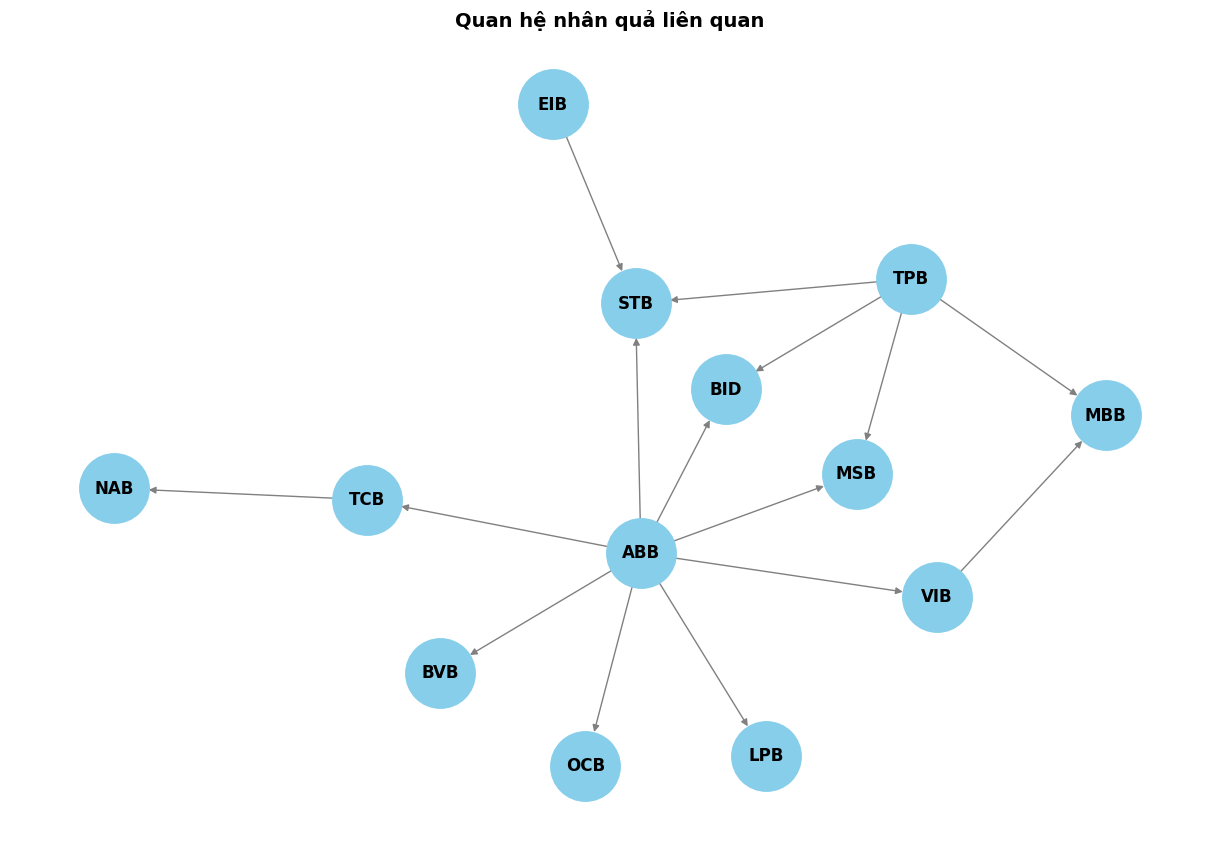

In [ ]:
# Chọn ra các cặp có shock IRF dương
selected_edges = [
    ("TCB", "NAB"),
    ("TPB", "BID"),
    ("TPB", "MBB"),
    ("TPB", "STB"),
    ("TPB", "MSB"),
    ("VIB", "MBB"),
    ("EIB", "STB"),
    ("ABB", "BID"),
    ("ABB", "TCB"),
    ("ABB", "STB"),
    ("ABB", "LPB"),
    ("ABB", "VIB"),
    ("ABB", "MSB"),
    ("ABB", "OCB"),
    ("ABB", "BVB"),
]
G1 = nx.DiGraph()
G1.add_edges_from(selected_edges)
plt.figure(figsize=(12, 8))  # Chiều rộng x chiều cao (inch)

pos = nx.nx_pydot.graphviz_layout(
    G1,
)  # hoặc "neato", "sfdp"
nx.draw(
    G1,
    pos,
    with_labels=True,
    node_color="skyblue",
    node_size=2500,
    font_size=12,
    arrows=True,
    edge_color="gray",
    font_weight="bold",
)
plt.title("Quan hệ nhân quả liên quan", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()

# IV. Định giá tài sản

### 1. Dữ liệu VnIndex

In [ ]:
vn_index = pd.read_csv("C:/Định giá/Dữ liệu/Vnindex/Vnindex.csv")
vn_index

,time,close
0,31/12/2024,1266.78
1,30/12/2024,1272.02
2,27/12/2024,1275.14
3,26/12/2024,1272.87
4,25/12/2024,1274.04
...,...,...
245,8/1/2024,1160.19
246,5/1/2024,1154.68
247,4/1/2024,1150.72
248,3/1/2024,1144.17


In [ ]:
vn_index["time"] = pd.to_datetime(vn_index["time"], format="%d/%m/%Y")

# Chuyển sang chuỗi yyyy-mm-dd hh:mm:ss
vn_index["time"] = vn_index["time"].dt.strftime("%Y-%m-%d %H:%M:%S")
vn_index

,time,close
0,2024-12-31 00:00:00,1266.78
1,2024-12-30 00:00:00,1272.02
2,2024-12-27 00:00:00,1275.14
3,2024-12-26 00:00:00,1272.87
4,2024-12-25 00:00:00,1274.04
...,...,...
245,2024-01-08 00:00:00,1160.19
246,2024-01-05 00:00:00,1154.68
247,2024-01-04 00:00:00,1150.72
248,2024-01-03 00:00:00,1144.17


In [ ]:
# Tính log return của VNindex
vn_index_log = vn_index.copy()
vn_index_log["time"] = pd.to_datetime(vn_index_log["time"], format="%Y-%m-%d %H:%M:%S")
vn_index_log = vn_index_log.sort_values(by="time")
vn_index_log.loc[:, vn_index_log.columns != "time"] = np.log(
    vn_index_log.loc[:, vn_index_log.columns != "time"]
    / vn_index_log.loc[:, vn_index_log.columns != "time"].shift(1)
)

In [ ]:
# Đồng bộ thời gian
df_merged = df_log.merge(vn_index_log, on="time", how="left")
df_merged

,time,BID,TCB,MBB,STB,ACB,TPB,LPB,VIB,EIB,SHB,MSB,OCB,ABB,BVB,NAB,close
0,2024-01-03,0.018608,0.015707,0.015658,0.026668,0.022473,0.008797,0.012423,0.014728,0.019271,0.026929,0.003595,0.030032,0.012121,0.019068,0.000000,0.010941
1,2024-01-04,-0.003358,0.015464,0.048673,0.003503,0.011895,0.025935,0.015314,0.015234,0.005192,0.016767,0.030627,0.013712,0.000000,0.027938,0.006900,0.005708
2,2024-01-05,0.019154,0.002554,0.019283,0.024181,0.005615,0.005416,0.006061,0.014296,0.000000,0.009456,0.008088,0.014486,-0.012121,0.009142,0.000000,0.003435
3,2024-01-08,0.041734,0.027054,0.009882,-0.003419,-0.003927,-0.003091,-0.003026,0.009887,-0.002881,0.012858,0.003446,0.023687,0.000000,0.000000,0.000000,0.004761
4,2024-01-09,-0.007411,0.011725,0.007536,0.000000,-0.013583,-0.010895,-0.006079,0.002106,-0.010441,0.000000,0.014798,-0.006576,-0.012270,-0.009142,0.000000,-0.001380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2024-12-25,0.014229,0.018645,0.022815,0.043700,0.017557,0.021521,0.020711,0.008057,-0.005115,0.005070,0.012605,0.009360,0.027029,0.025631,0.006329,0.010796
236,2024-12-26,0.009116,-0.004207,0.018007,0.023178,0.004224,0.008889,-0.010302,0.027999,-0.012903,0.000000,0.004167,-0.009360,-0.013423,0.008688,0.006289,-0.000919
237,2024-12-27,0.003881,0.010484,0.006135,0.008054,0.000000,0.012179,0.065832,0.015486,0.010336,0.000000,0.013423,0.005211,0.000000,-0.017452,0.006250,0.001782
238,2024-12-30,-0.023254,-0.008379,-0.009834,0.011960,-0.006108,-0.006071,0.017505,-0.015486,-0.007742,-0.005070,0.000000,0.004149,0.000000,0.000000,0.000000,-0.002450


### 2. Định giá bằng CAPM

In [ ]:
def capm_valuation(log_return_df, market_return, rf=0.0297):

    results = []
    market_var = np.var(market_return, ddof=1)

    for col in log_return_df.columns:
        Ri = log_return_df[col].dropna()
        common_idx = Ri.index.intersection(market_return.index)
        Ri = Ri.loc[common_idx]
        Rm = market_return.loc[common_idx]

        cov = np.cov(Ri, Rm, ddof=1)[0, 1]
        beta = cov / market_var
        expected_return = rf + beta * (Rm.mean() - rf)
        results.append({"Bank": col, "Beta": beta, "Expected_Return": expected_return})

    results_df = pd.DataFrame(results)
    results_df["Rank"] = results_df["Expected_Return"].rank(
        ascending=False, method="min"
    )
    results_df = results_df.sort_values(by="Rank")
    return results_df


#
cap_value = capm_valuation(
    log_return_df=df_merged.loc[
        :, [x for x in df_merged if x not in ["time", "close"]]
    ],
    market_return=df_merged.loc[:, "close"],
    rf=0.1,
)

In [ ]:
selected_ER = cap_value[cap_value["Expected_Return"] > 0]
selected_edges_2 = selected_edges
selected_edges_2 = [
    (x, y)
    for x, y in selected_edges
    if x in list(selected_ER["Bank"]) and y in list(selected_ER["Bank"])
]

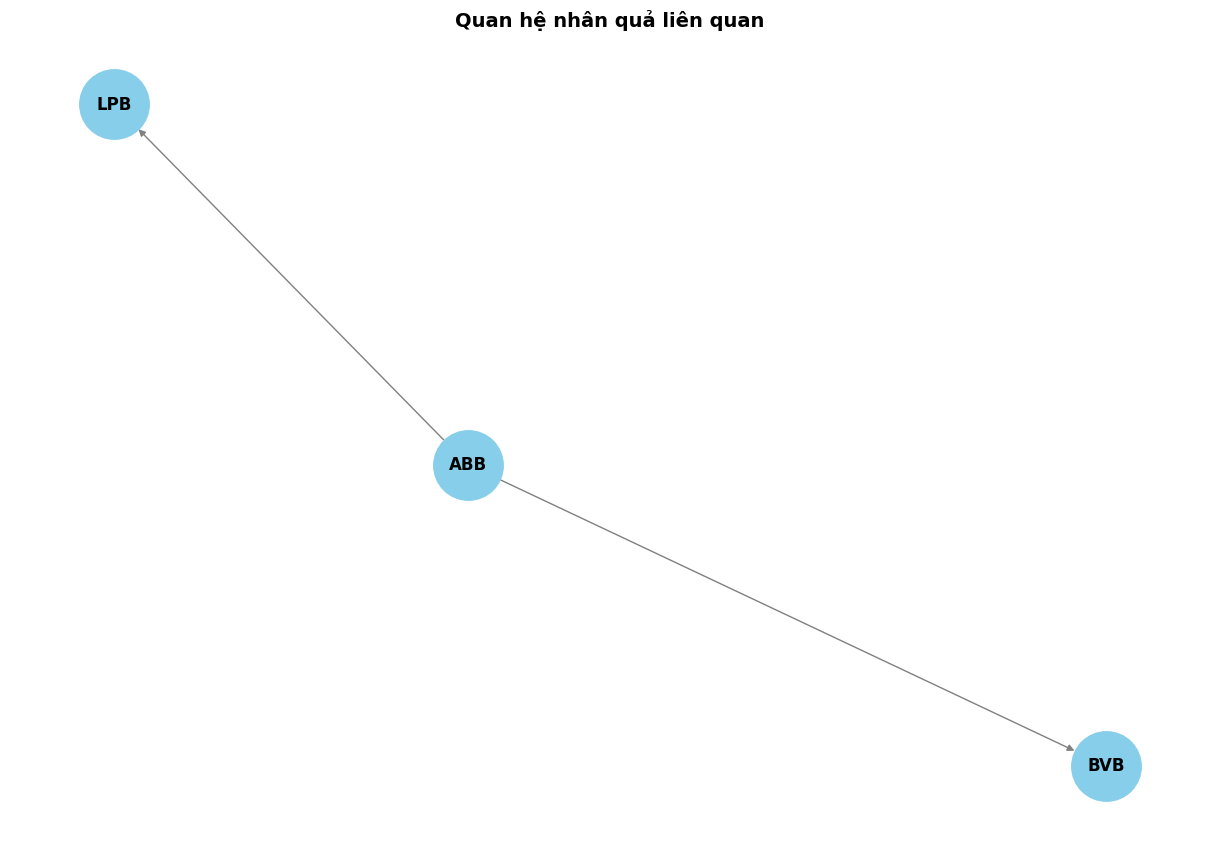

In [ ]:
plt.figure(figsize=(12, 8))  # Chiều rộng x chiều cao (inch)
G2 = nx.DiGraph()
G2.add_edges_from(selected_edges_2)
pos = nx.nx_pydot.graphviz_layout(G2, prog="neato")  # hoặc "neato", "sfdp"
nx.draw(
    G2,
    pos,
    with_labels=True,
    node_color="skyblue",
    node_size=2500,
    font_size=12,
    arrows=True,
    edge_color="gray",
    font_weight="bold",
)
plt.title("Quan hệ nhân quả liên quan", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()

# V. Quyết định đầu tư

In [ ]:
selected_bank_2 = []
for i, j in selected_edges_2:
    if i not in selected_bank_2:
        selected_bank_2.append(i)
    if j not in selected_bank_2:
        selected_bank_2.append(j)

In [ ]:
# Tính toán trọng số để phân bổ tài sản đầu tư
def allocate_assets_beta_er(
    df, beta_col="Beta", er_col="Expected_Return", max_beta=None
):
    """
    Phân bổ tài sản chỉ dựa trên beta và expected return.

    Parameters:
    - df: DataFrame có các cột beta và expected return
    - beta_col: tên cột beta
    - er_col: tên cột expected return
    - max_beta: nếu đặt giá trị, loại cổ phiếu beta > max_beta

    Returns:
    - DataFrame với trọng số phân bổ
    """
    df = df.copy()

    # Lọc theo beta lớn
    if max_beta is not None:
        df = df[df[beta_col] <= max_beta]

    # Tính trọng số sơ bộ
    df["weight_raw"] = df[er_col] / df[beta_col]

    # Chuẩn hóa trọng số
    df["weight"] = df["weight_raw"] / df["weight_raw"].sum()

    return df[
        [
            "Bank",
        ]
    ]


# ==========================
# Ví dụ sử dụng
# ==========================

for i in list(selected_ER["Bank"]):
    if i not in selected_bank_2:
        selected_ER = selected_ER[selected_ER["Bank"] != i]
df_alloc = allocate_assets_beta_er(selected_ER, max_beta=1.5)
df_alloc

,Bank
12,ABB
6,LPB
13,BVB
